In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [44]:
plt.rcParams["figure.figsize"] = (10,8)

In [45]:
os.getcwd()

'/mnt/c/Users/Master/Desktop/Adalab/Adalab-project-da-promo-A-module-3-team-4'

In [46]:
#os.chdir('/mnt/c/Users/User/Desktop/ADALAB/MODULO3/Adalab-project-da-promo-A-module-3-team-4')

In [47]:
df = pd.read_csv('datos/bikes_limpio.csv', index_col=0)

In [48]:
df.head(2)

,fecha,estacion,año,mes,festivo,dia_semana,dia_laboral,tiempo,temperatura,sensacion_term,humedad,velocidad_viento,cliente_casual,cliente_registrado,total_clientes
indice,,,,,,,,,,,,,,,
1,2018-01-01,invierno,2018,January,1,Lunes,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,2018-02-01,invierno,2018,February,0,Jueves,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801


- instant: record index
- dteday : date
- season : season (spring, summer, autumn, winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [49]:
for i in ['festivo', 'dia_laboral', 'tiempo']:
    df[i] = df[i].astype('category')

## Exploracion Visual


In [50]:
df.dtypes

fecha                   object
estacion                object
año                      int64
mes                     object
festivo               category
dia_semana              object
dia_laboral           category
tiempo                category
temperatura            float64
sensacion_term         float64
humedad                float64
velocidad_viento       float64
cliente_casual           int64
cliente_registrado       int64
total_clientes           int64
dtype: object

In [51]:
df_num = df.select_dtypes(include=np.number)
df_num.head()

,año,temperatura,sensacion_term,humedad,velocidad_viento,cliente_casual,cliente_registrado,total_clientes
indice,,,,,,,,
1,2018,14.110847,18.18125,80.5833,10.749882,331,654,985
2,2018,14.902598,17.68695,69.6087,16.652113,131,670,801
3,2018,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,2018,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,2018,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [52]:
df_cat = df.select_dtypes(exclude=np.number).drop('fecha', axis=1)
df_cat.head(2)

,estacion,mes,festivo,dia_semana,dia_laboral,tiempo
indice,,,,,,
1,invierno,January,1,Lunes,0,2
2,invierno,February,0,Jueves,1,2


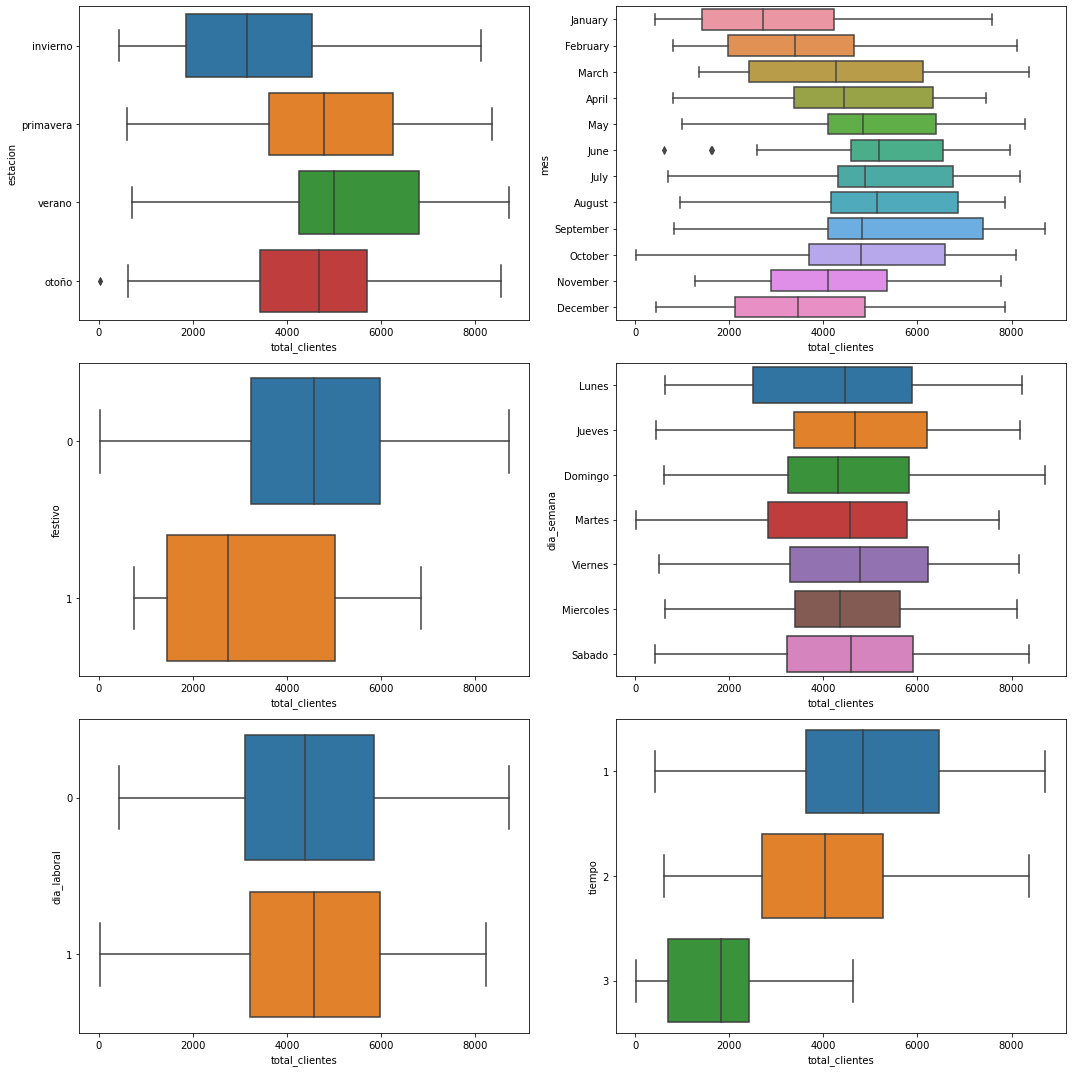

In [53]:
fig, axes = plt.subplots(3, 2, figsize=(15,15))

axes = axes.flat

for i, col in enumerate(df_cat.columns):
    sns.boxplot(y=col, x='total_clientes', data=df, ax=axes[i])

plt.tight_layout();

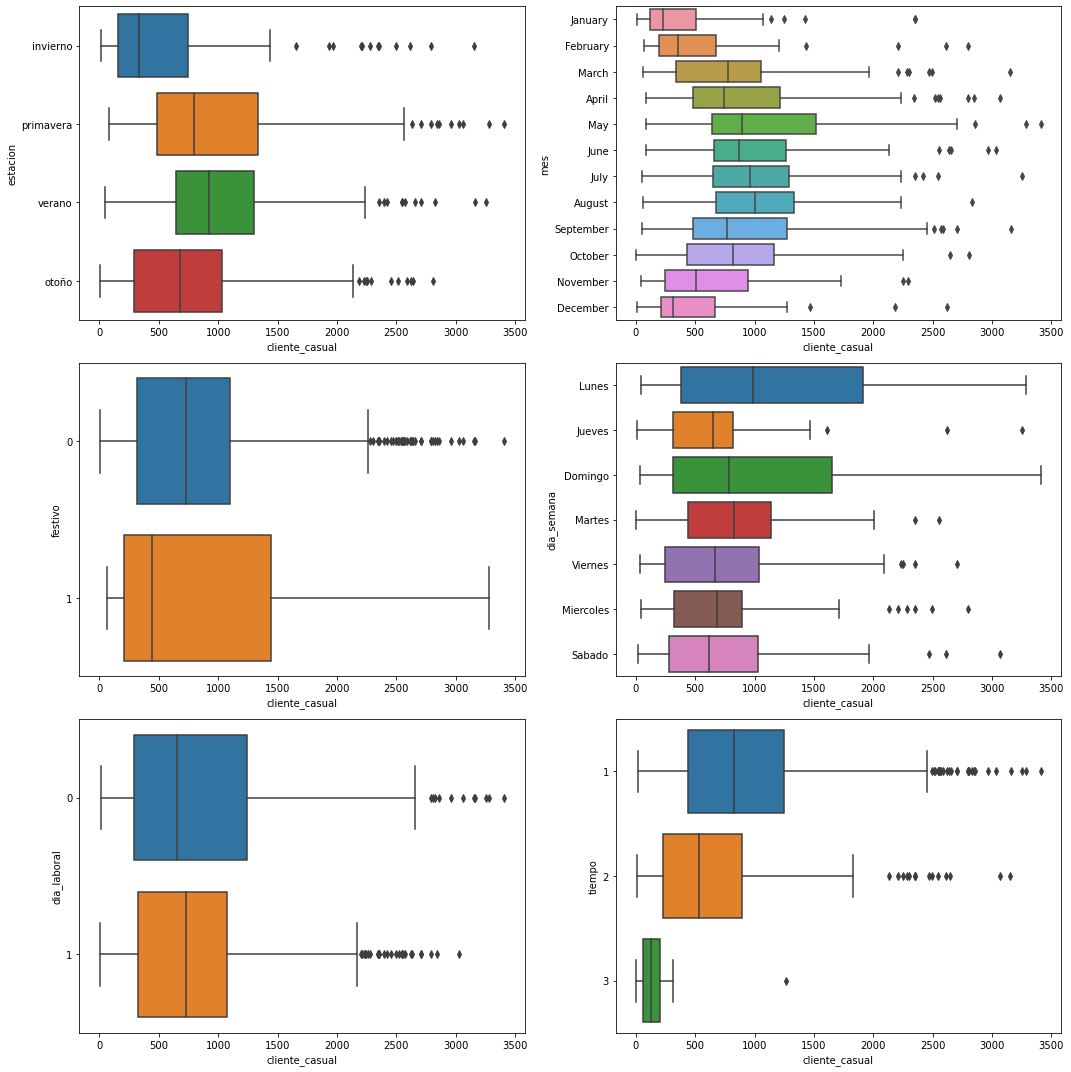

In [54]:
fig, axes = plt.subplots(3, 2, figsize=(15,15))

axes = axes.flat

for i, col in enumerate(df_cat.columns):
    sns.boxplot(y=col, x='cliente_casual', data=df, ax=axes[i])

plt.tight_layout();

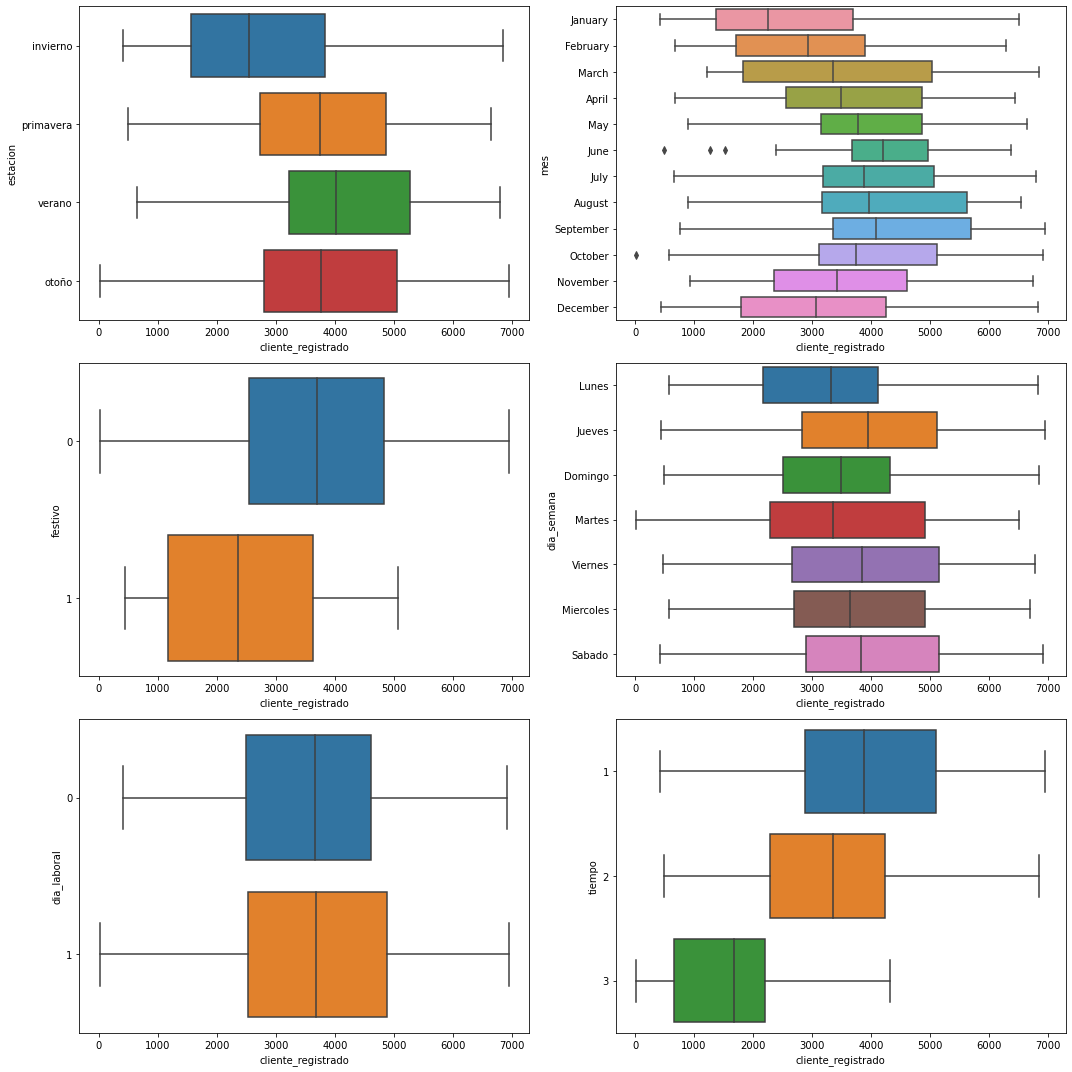

In [55]:
fig, axes = plt.subplots(3, 2, figsize=(15,15))

axes = axes.flat

for i, col in enumerate(df_cat.columns):
    sns.boxplot(y=col, x='cliente_registrado', data=df, ax=axes[i])

plt.tight_layout();

In [56]:
df['cliente_casual'].sum()

619952

In [57]:
df['cliente_registrado'].sum()

2670893

/tmp/ipykernel_1903/1602557378.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)


<AxesSubplot:>

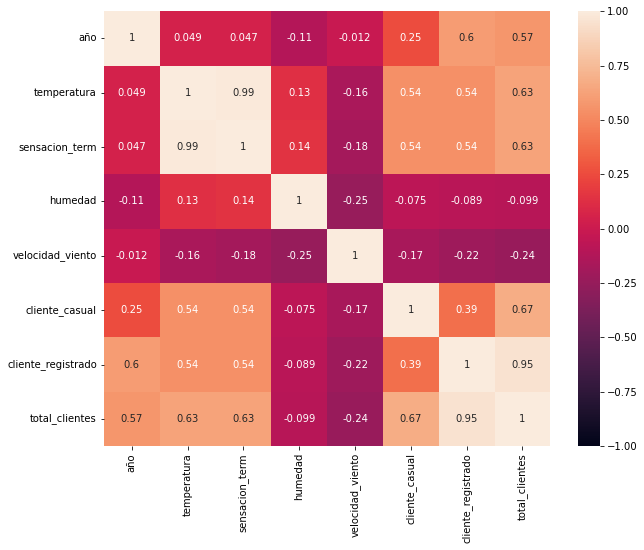

In [58]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)

- observando las correlaciones, vemos que se podrían eliminar algunas columnas redundantes o que no tienen fuertes correlaciones con las posibles VR:
    - sensacion_term (muy parecido a temperatura)
    - humedad (muy baja correlación con el numero de clientes)
    - velocidad del viento (baja correlación con el numero de clientes)

<AxesSubplot:xlabel='total_clientes', ylabel='Count'>

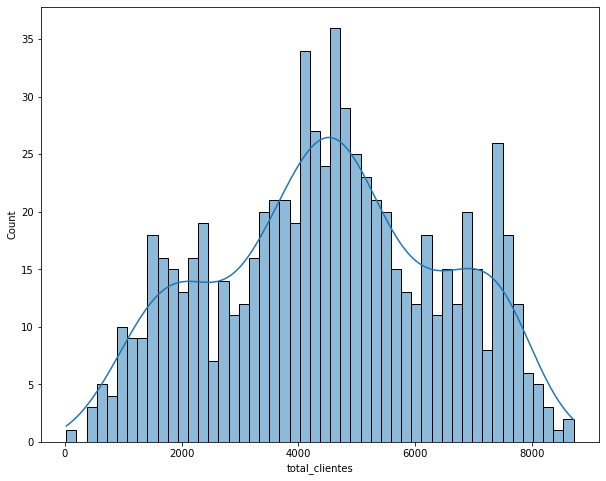

In [59]:
sns.histplot(x='total_clientes', data=df, kde=True, bins=50)

In [60]:
q3 = np.percentile(df["cliente_casual"], 75)
q3

1096.5

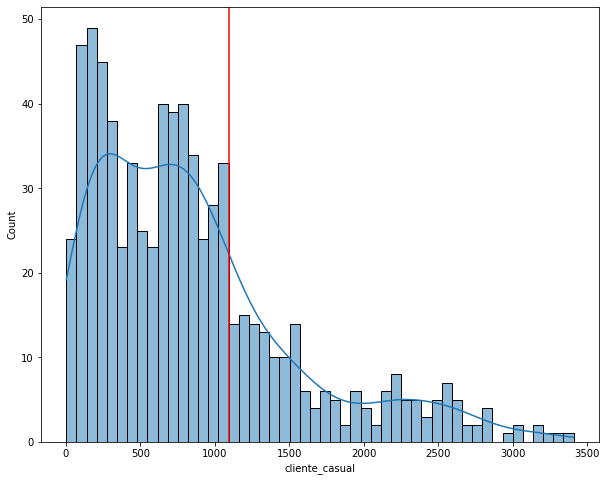

In [61]:
plt.figure()
sns.histplot(x='cliente_casual', data=df, kde=True, bins=50)
plt.axvline(x= q3, color ='red')

<AxesSubplot:xlabel='cliente_casual'>

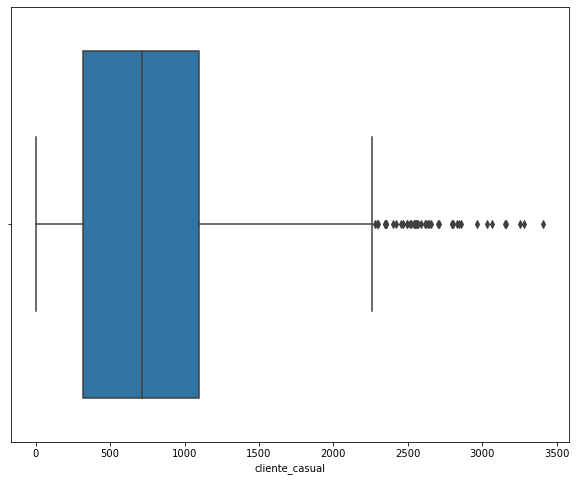

In [62]:
sns.boxplot(x='cliente_casual', data=df)

In [63]:
df_q3 = df[df['cliente_casual'] <= q3]
df_q3

,fecha,estacion,año,mes,festivo,dia_semana,dia_laboral,tiempo,temperatura,sensacion_term,humedad,velocidad_viento,cliente_casual,cliente_registrado,total_clientes
indice,,,,,,,,,,,,,,,
1,2018-01-01,invierno,2018,January,1,Lunes,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,2018-02-01,invierno,2018,February,0,Jueves,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,2018-03-01,invierno,2018,March,0,Jueves,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,2018-04-01,primavera,2018,April,0,Domingo,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,2018-05-01,primavera,2018,May,0,Martes,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2019-12-27,invierno,2019,December,0,Viernes,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,2019-12-28,invierno,2019,December,0,Sabado,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,2019-12-29,invierno,2019,December,0,Domingo,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341


<AxesSubplot:xlabel='cliente_casual'>

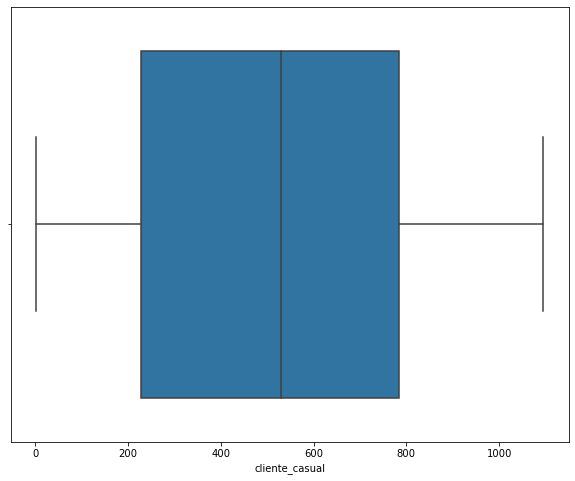

In [64]:
sns.boxplot(x='cliente_casual', data=df_q3)

<AxesSubplot:xlabel='cliente_casual', ylabel='Count'>

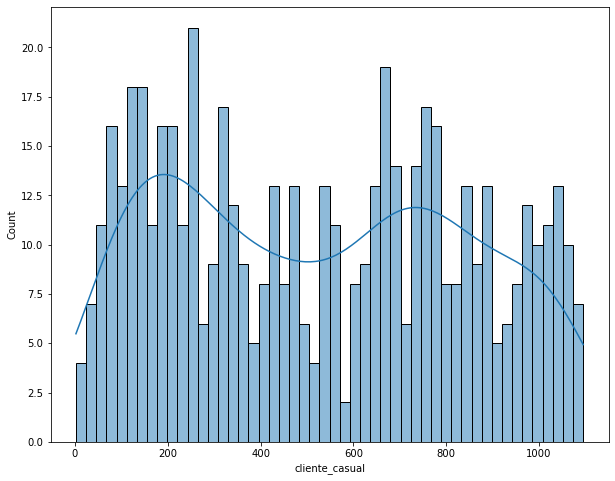

In [65]:
sns.histplot(x='cliente_casual', data=df_q3, kde=True, bins=50)


In [66]:
stats.shapiro(df_q3['cliente_casual'])

ShapiroResult(statistic=0.94301438331604, pvalue=1.2082529258789637e-13)

In [67]:
df_outliers = df[df['cliente_casual'] > q3]

<AxesSubplot:xlabel='cliente_casual'>

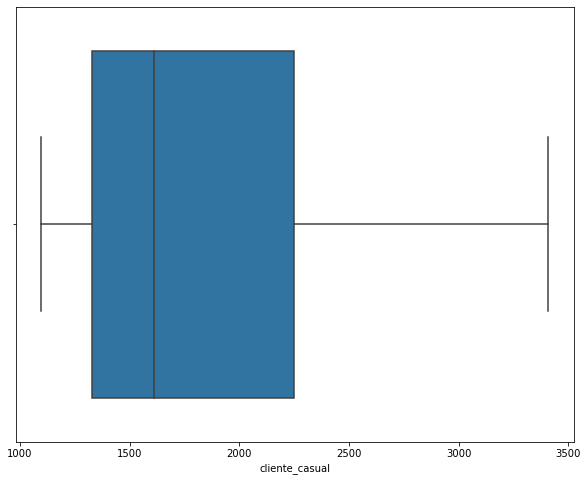

In [68]:
sns.boxplot(x='cliente_casual', data=df_outliers)

<AxesSubplot:xlabel='cliente_casual', ylabel='Count'>

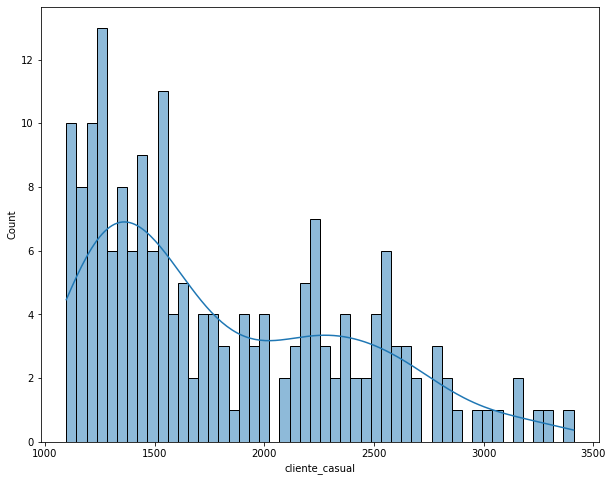

In [69]:
sns.histplot(x='cliente_casual', data=df_outliers, kde=True, bins=50)


<AxesSubplot:xlabel='cliente_registrado'>

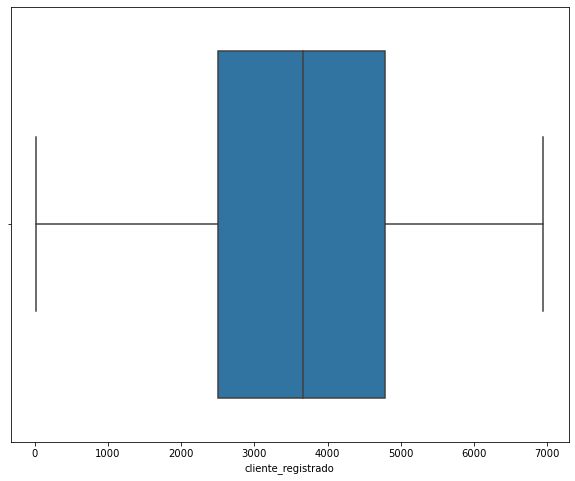

In [70]:
sns.boxplot(x='cliente_registrado', data=df)

<AxesSubplot:xlabel='cliente_registrado', ylabel='Count'>

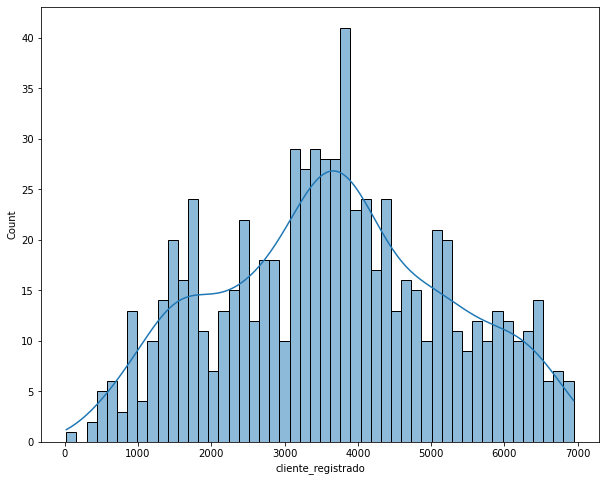

In [71]:
sns.histplot(x='cliente_registrado', data=df, kde=True, bins=50)

In [72]:
stats.shapiro(df['cliente_registrado'])

ShapiroResult(statistic=0.98438560962677, pvalue=5.023745757171127e-07)

In [73]:
stats.shapiro(df['cliente_casual'])

ShapiroResult(statistic=0.8850967288017273, pvalue=7.660028716313278e-23)

In [74]:
stats.shapiro(df['total_clientes'])

ShapiroResult(statistic=0.9802490472793579, pvalue=2.313480784721378e-08)

In [75]:
df.head()

,fecha,estacion,año,mes,festivo,dia_semana,dia_laboral,tiempo,temperatura,sensacion_term,humedad,velocidad_viento,cliente_casual,cliente_registrado,total_clientes
indice,,,,,,,,,,,,,,,
1,2018-01-01,invierno,2018,January,1,Lunes,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,2018-02-01,invierno,2018,February,0,Jueves,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,2018-03-01,invierno,2018,March,0,Jueves,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,2018-04-01,primavera,2018,April,0,Domingo,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,2018-05-01,primavera,2018,May,0,Martes,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


- VARIABLES NUMÉRICAS QUE AFECTAN A VRs
    - la temperatura
- VARIABLES CATEGÓRICAS (QUE HABRÁ QUE CODIFICAR) QUE AFECTAN:
    - el tiempo
    - festivo
    - día_semana/día_laboral

- Hemos decidido que vamos a dividir los datos: por clientes casuales y registrados, para hacer dos modelos de predicción distintos, según el tipo de cliente.

- Dejamos el dataframe listo para trabajar y para ello:
  - Tras haber estudiado los datos visualmente (con un heatmap), hemos decidido eliminar la variable "sensación_térmica", ya que es la misma información que aparece en temperatura.
  - También vemos claro que la columna "Total" no nos resulta interesante.
  - Del mismo modo, vemos que la variable "Humedad" apenas tiene relación con las que serán nuestras VR, por lo tanto, decidimos prescindir de ella.

In [76]:
#Eliminamos las columnas

df.drop(['sensacion_term', 'total_clientes', 'humedad'], axis = 1, inplace=True)

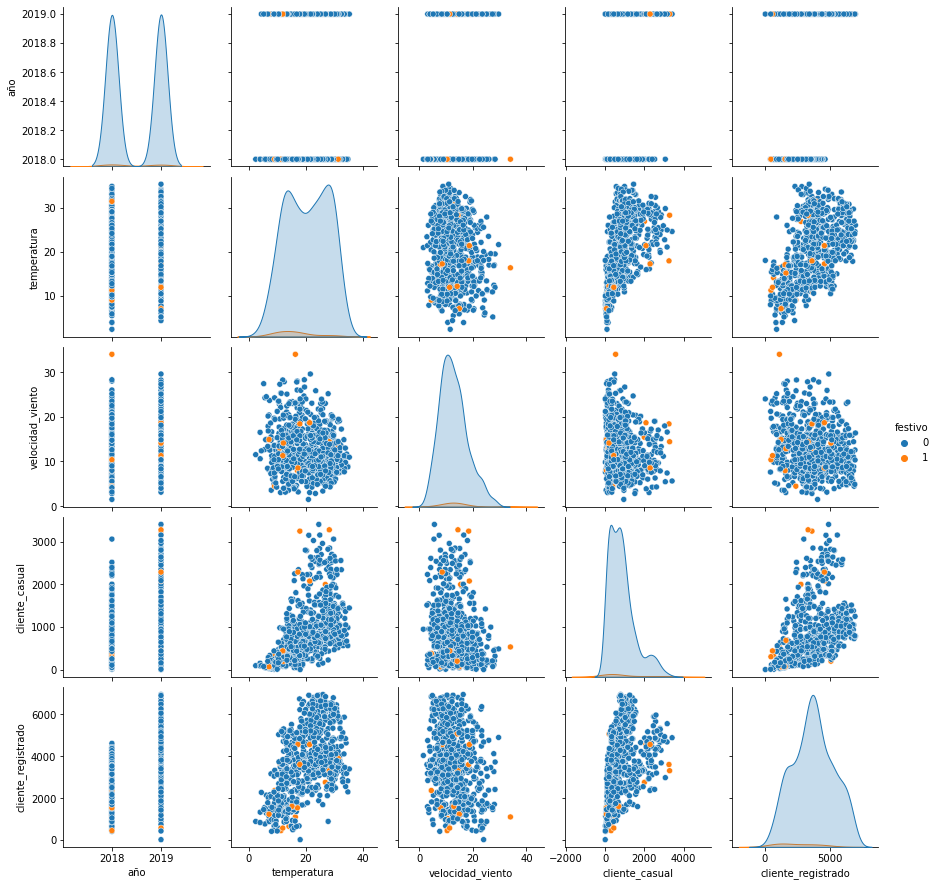

In [77]:
sns.pairplot(df, hue = 'festivo');


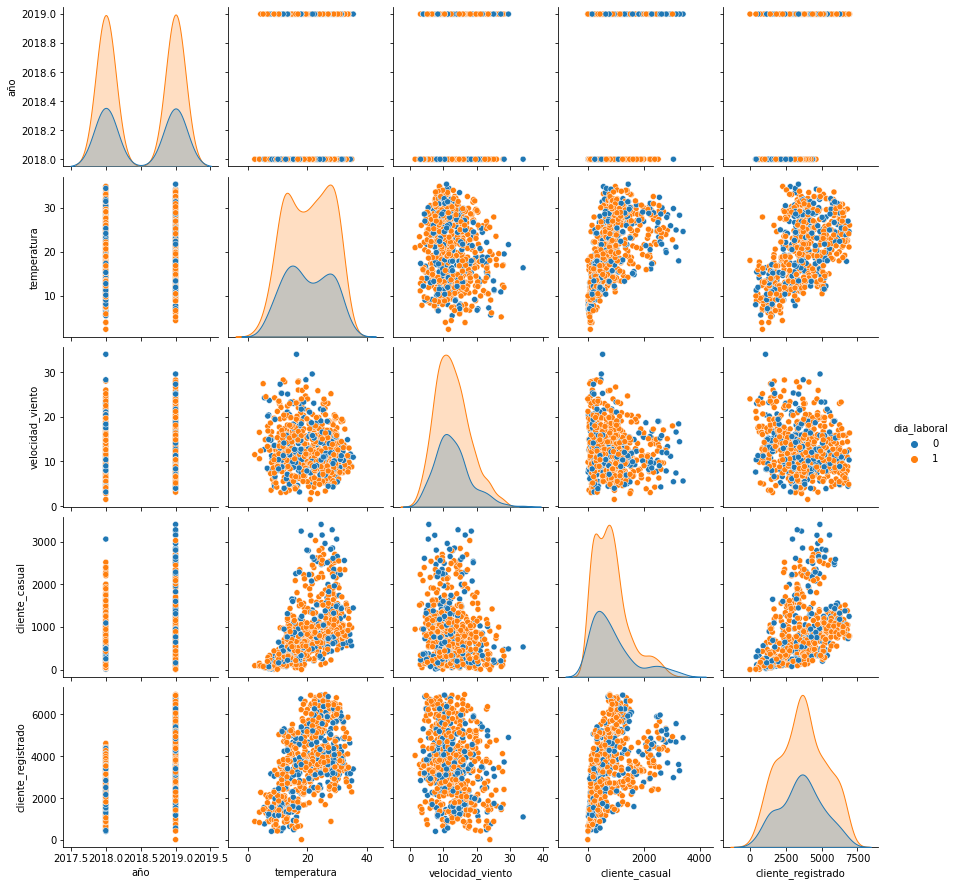

In [78]:
sns.pairplot(df, hue = 'dia_laboral')

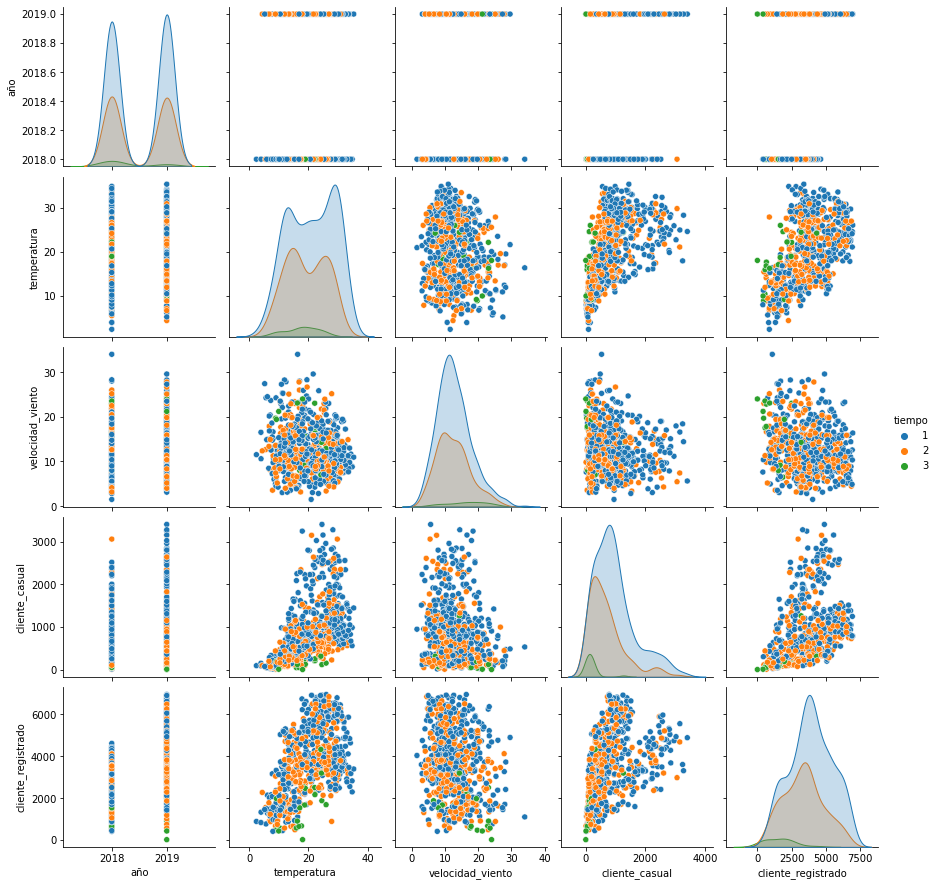

In [79]:
sns.pairplot(df, hue = 'tiempo')

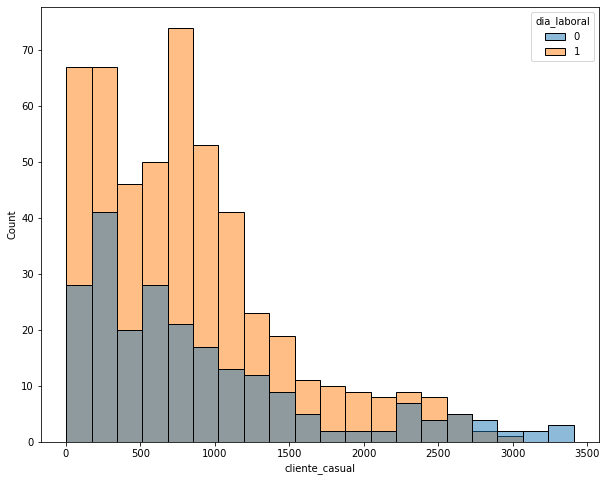

In [80]:
sns.histplot(x= 'cliente_casual', data = df, hue = 'dia_laboral'); #hay más clientes casuales los días laborables, pero habría que verlo en proporción porque hay más días laborables que no laborables

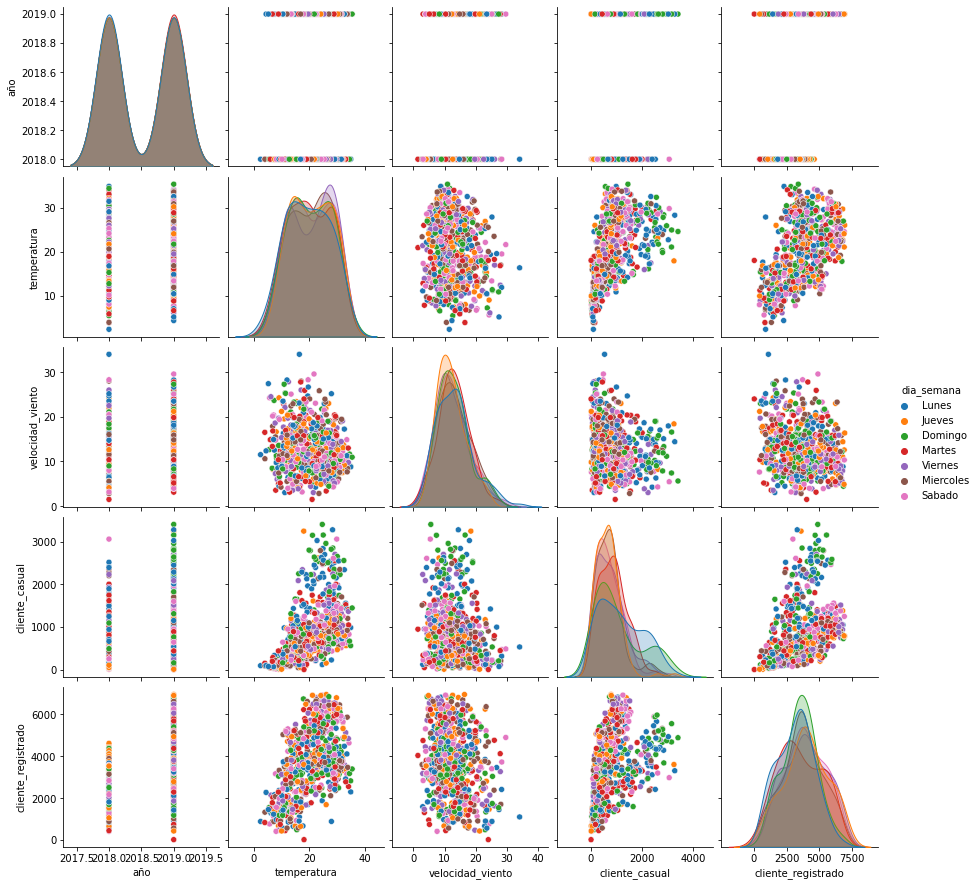

In [81]:
sns.pairplot(df, hue = 'dia_semana')

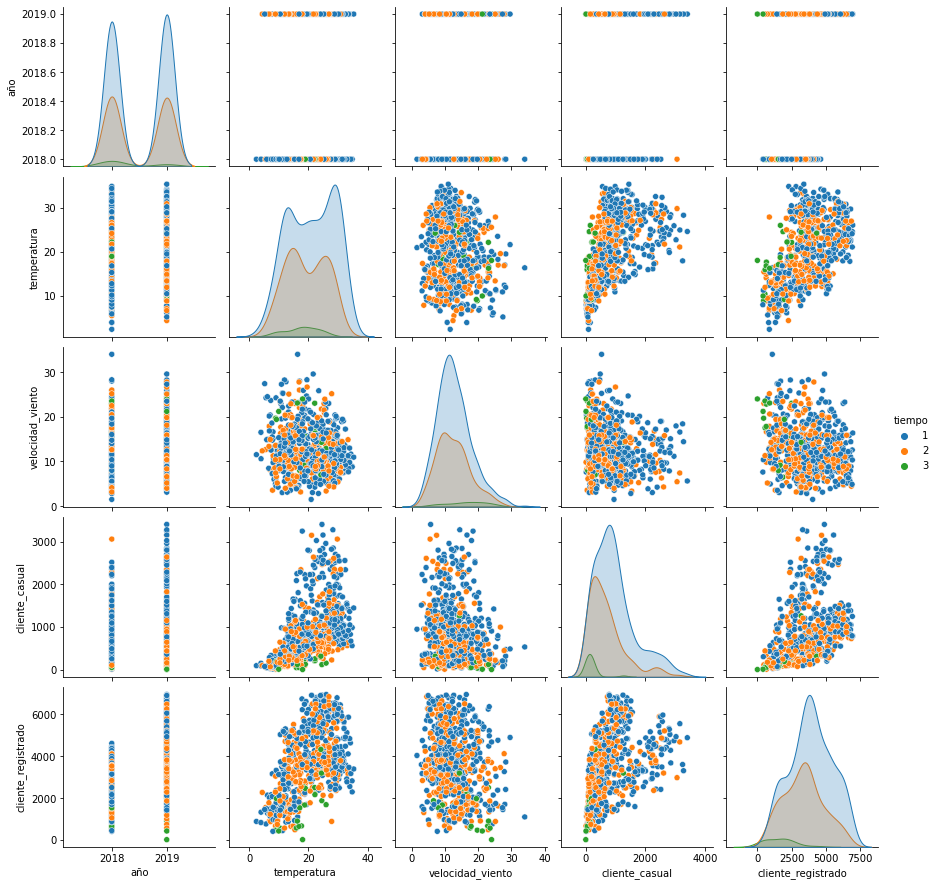

In [82]:
sns.pairplot(df, hue = 'tiempo')

In [83]:
df.to_csv('datos/bikes_limpio.csv')